In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from IPython.display import Video
%matplotlib widget
plt.style.use('dark_background')
from scipy import integrate as int

In [2]:
A = SlabExact(symmetric=True)

In [143]:
def dirac(x, tol=.007):
    return 2/tol * np.where(np.abs(x)<= tol,1,0)
    
def dirac_exact(beta, field_type='TE', sign='+1', phase=None):
    M = A.coefficients(beta, up_to_region=1, field_type=field_type, mode_type='radiation',
                      sign=sign, phase=phase)
    return beta/(2*A.K0)*np.sum(M[..., 1], axis=len(M[..., 1].shape)-1)

def f(x):
    return 1-x**2

def g(x):
    return np.exp(-x**2)

def test_exact(beta):
    return np.cosh(beta) *np.exp(1j*beta**2)

In [144]:
xs = np.linspace(-5,5,2000)

In [147]:
betas = np.linspace(.1, 10, 1000)*1j

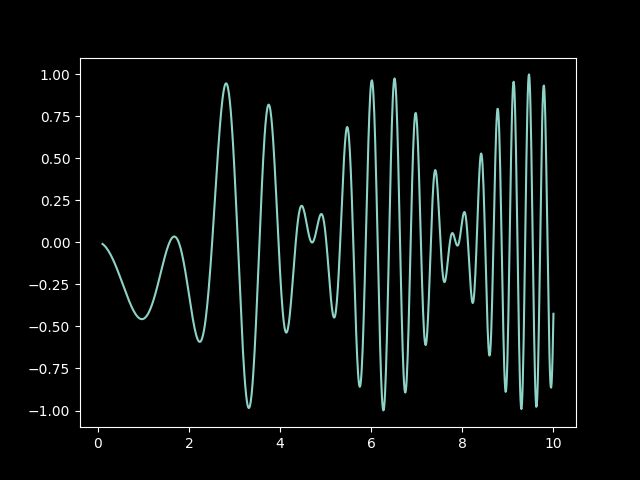

In [148]:
plt.close('all')
plt.plot(betas.imag, test_exact(betas).imag)

In [149]:
Propagator = A.propagator()

## Propagation using exact test beta function

In [150]:
Pimag = Propagator(exact_coeff_func=test_exact, L_beta=.1, R_beta=10,  N_beta=600,imag_type=True)

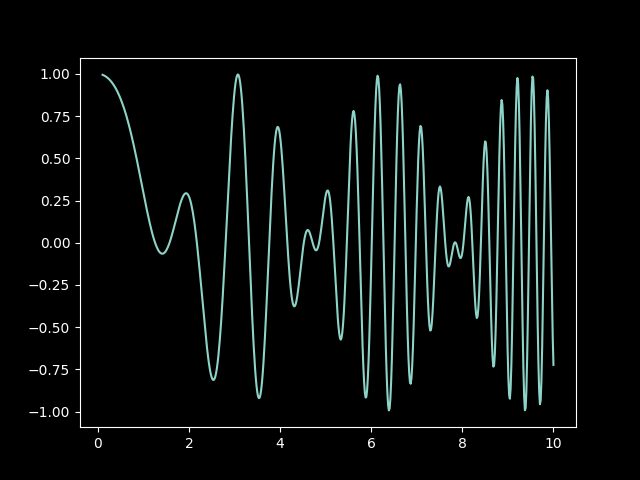

In [151]:
plt.close('all')
plt.plot(Pimag.betas.imag, Pimag.alphas.real);

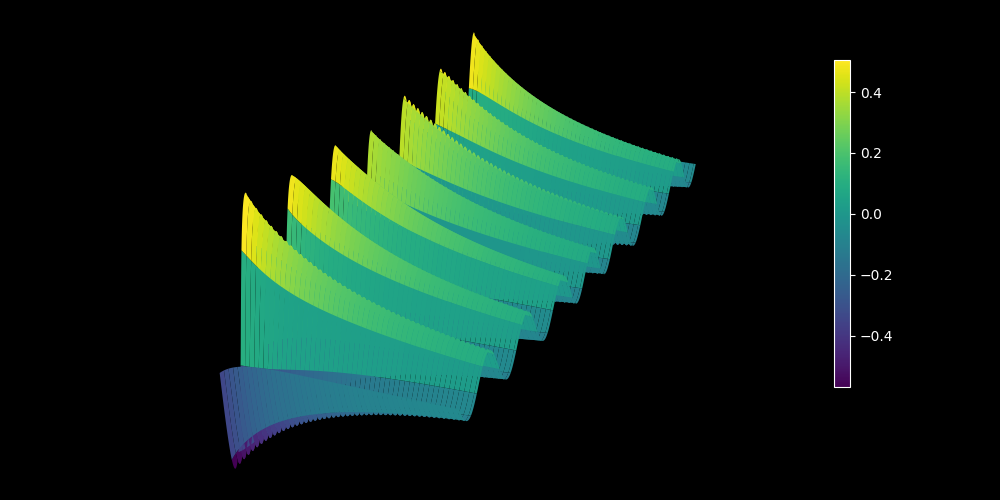

In [152]:
A.plot_field_2d(Pimag.propagate, xs=xs, surface=True, part='imag', zoom=2)

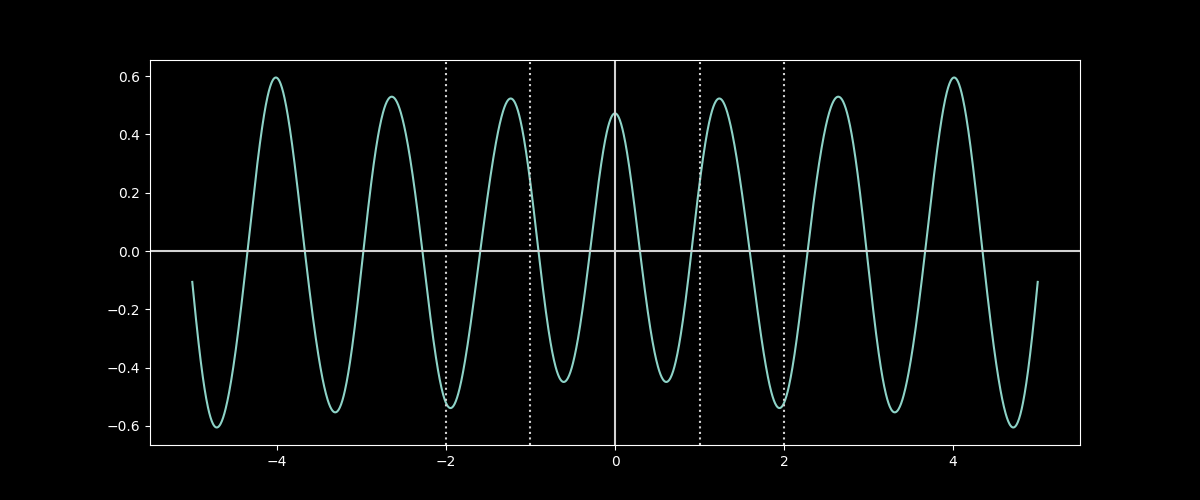

In [153]:
plt.close('all')
A.plot_field_1d(Pimag.slice_propagate, xs=xs, part='imag')

In [ ]:
Peven = Propagator(f=f, Lx=-5, Rx=5, N_beta=300, epsabs=1e1, epsrel=1e1)

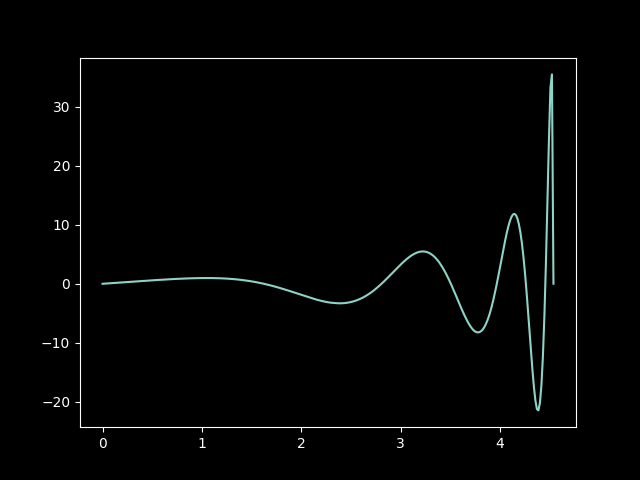

In [92]:
plt.close('all')
plt.plot(Peven.betas, Peven.alphas.real);

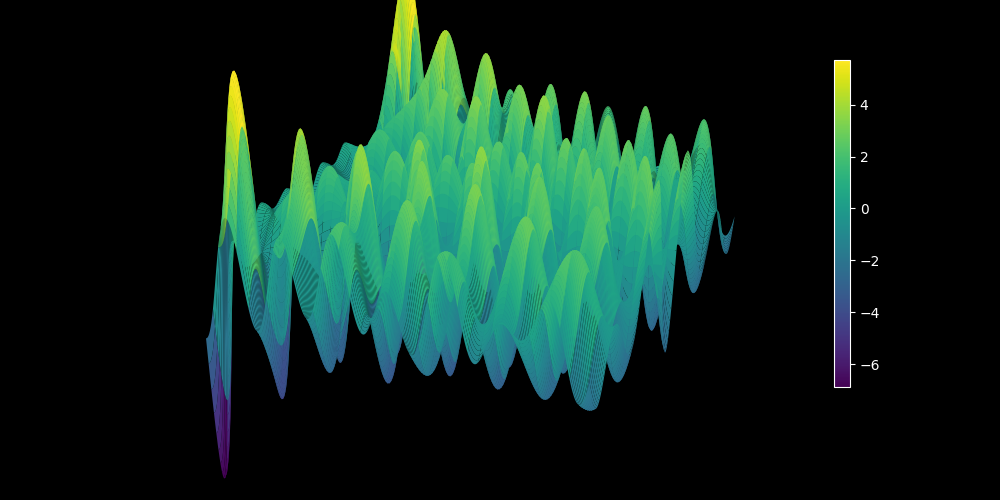

In [155]:
A.plot_field_2d(Peven.propagate, xs=xs, zmax=10, zref=400, colorbar=True, figwidth=5, surface=True,
                cstride=10, rstride=10, zoom=2, part='real')


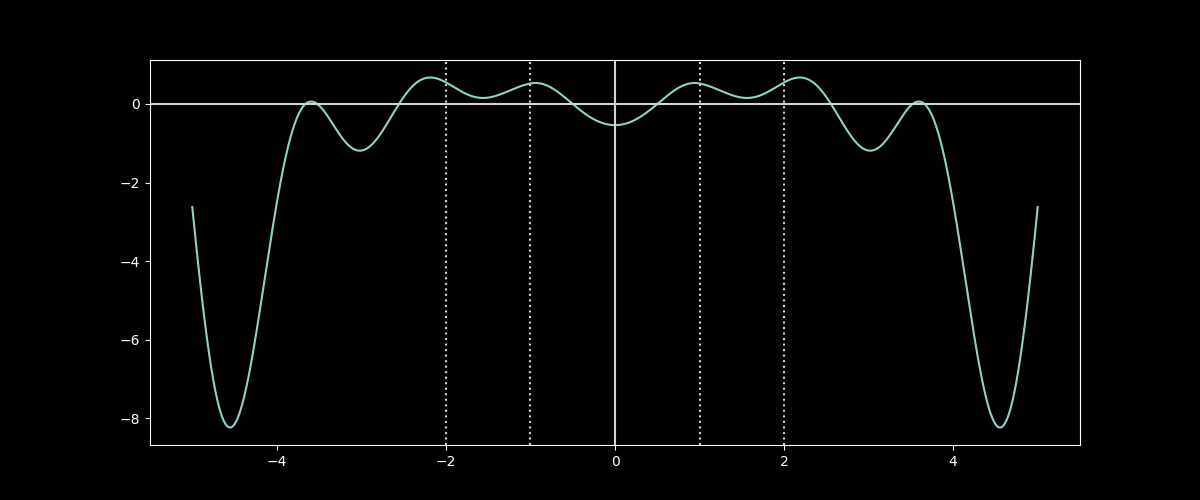

In [100]:
A.plot_field_1d(Peven.slice_propagate, xs=xs, part='real')


In [112]:
Podd = Propagator(f=f, Lx=-5, Rx=5, N_beta=300, epsabs=1e1, epsrel=1e1, sign='-1')

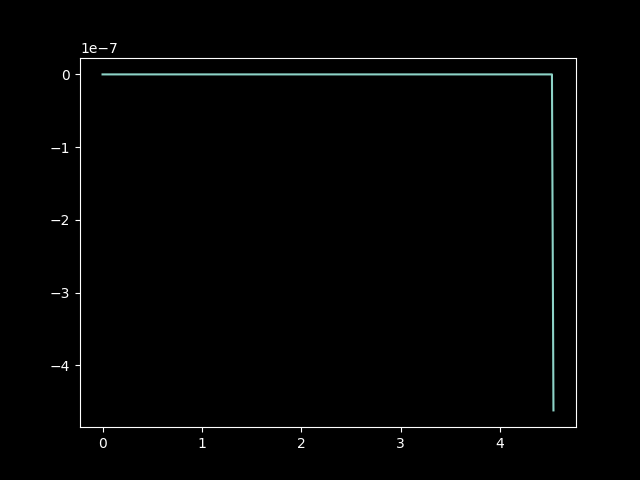

In [113]:
plt.close('all')
plt.plot(Podd.betas, Podd.alphas.real);

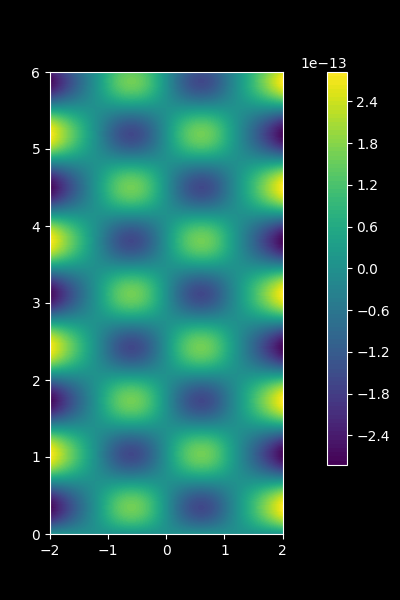

In [114]:
A.plot_field_2d(Podd.propagate,  zmax=6, zref=400, cmap='viridis', pad=.1, colorbar=True, part='imag')


In [104]:
F = lambda x, zs=None : -Peven.propagate(x,zs) - Pimag.propagate(x,zs)

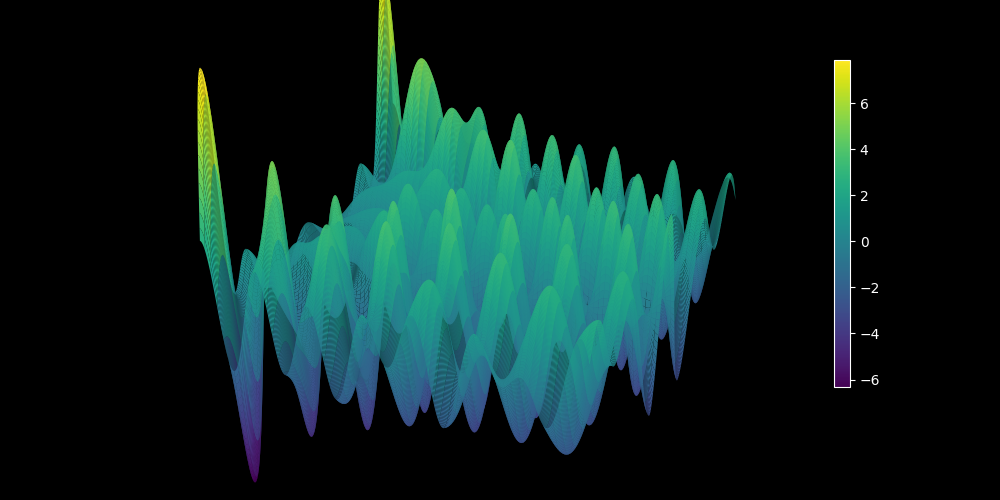

In [105]:
A.plot_field_2d(F, xs=xs, zmax=10, zref=400, surface=True, cstride=5, rstride=5)

In [106]:
Fslice = lambda x, zs=0: -Peven.slice_propagate(x,zs) - Pimag.slice_propagate(x,zs)

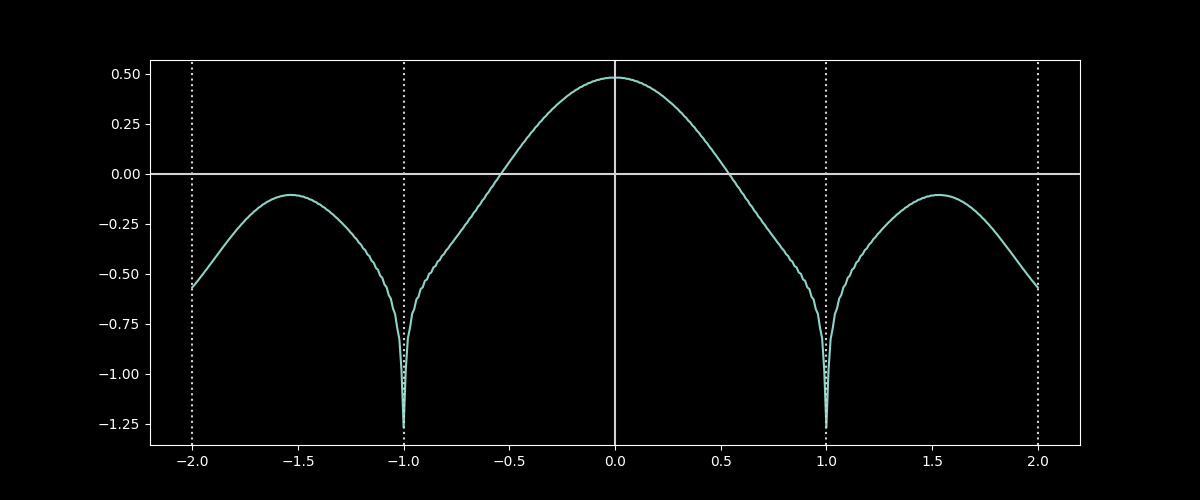

In [111]:
A.plot_field_1d(Fslice, part='real')
# Xs = np.linspace(-1, 1, 100)
# plt.plot(Xs, .5*(1-(Xs/.5)**2))

## Propagation for e^{-x^2}

In [137]:
Pimag = Propagator(f=g, Lx=-5, Rx=5, R_beta=100,  N_beta=300, epsabs=1e-5, epsrel=1e-5, imag_type=True)

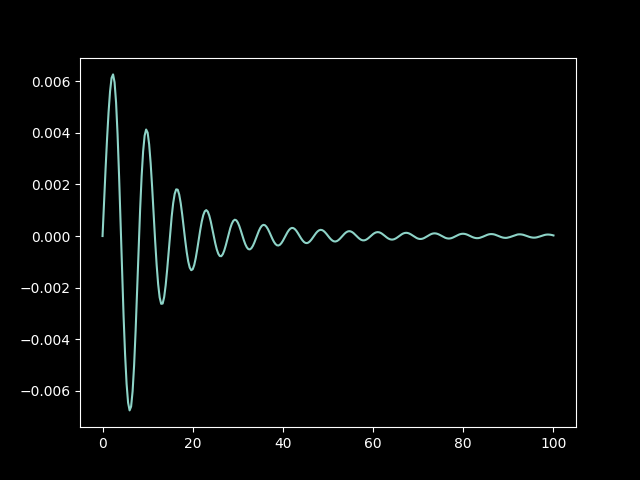

In [138]:
plt.close('all')
plt.plot(Pimag.betas.imag, Pimag.alphas.imag);

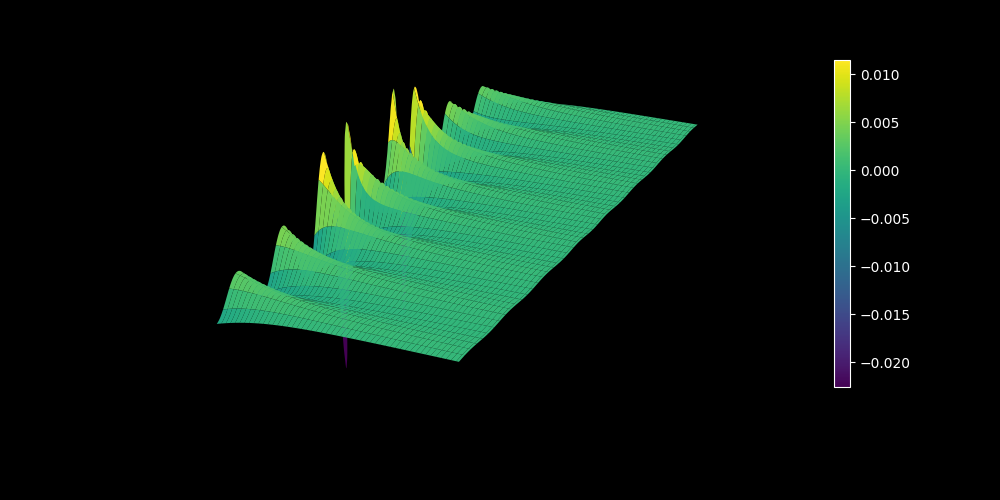

In [139]:
A.plot_field_2d(Pimag.propagate, xs=xs, surface=True, part='real', zoom=2)

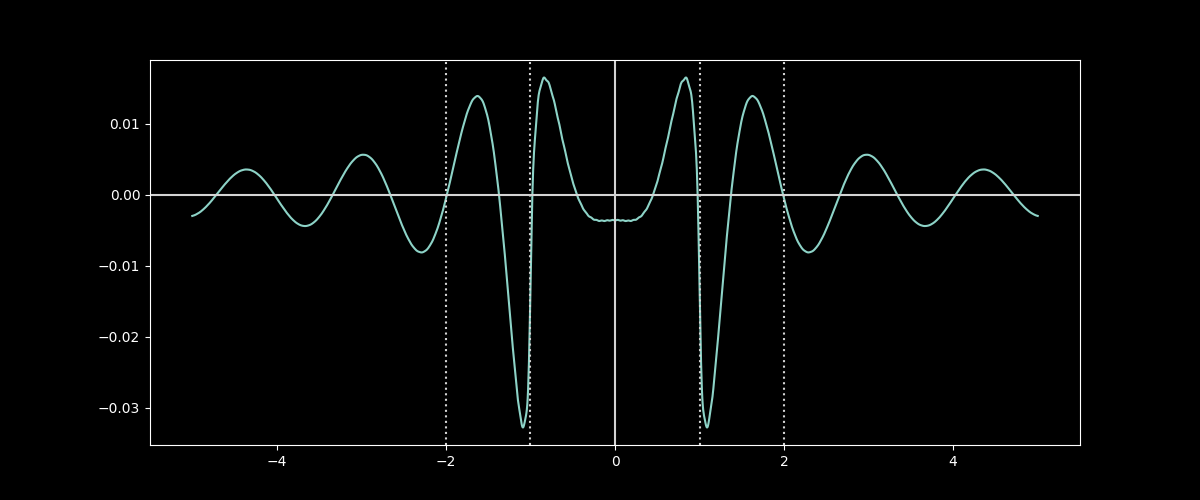

In [140]:
plt.close('all')
A.plot_field_1d(Pimag.slice_propagate, xs=xs)

In [141]:
Peven = Propagator(f=f, Lx=-5, Rx=5, N_beta=300, epsabs=1e1, epsrel=1e1)

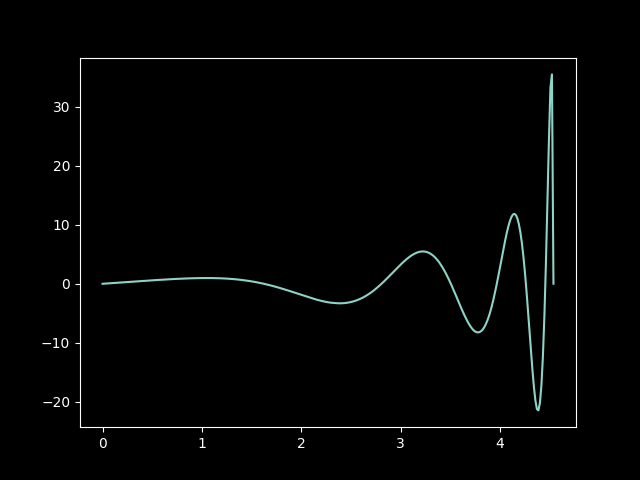

In [142]:
plt.close('all')
plt.plot(Peven.betas, Peven.alphas.real);

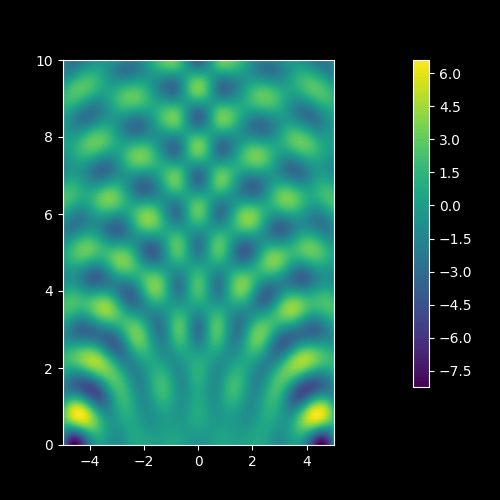

In [144]:
A.plot_field_2d(Peven.propagate, xs=xs, zmax=10, zref=400, colorbar=True, figwidth=5,
                cstride=10, rstride=10, zoom=2, part='real')


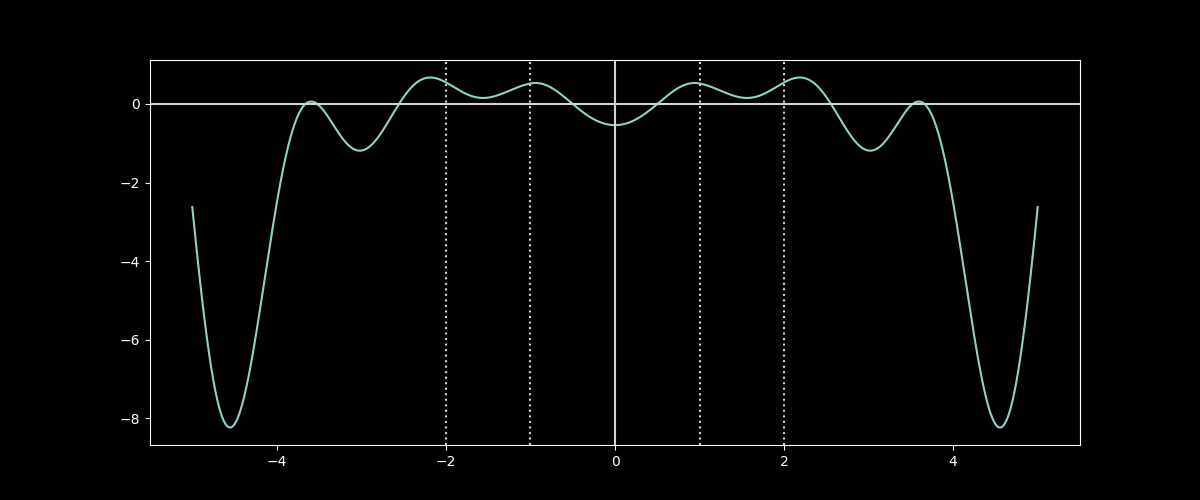

In [145]:
A.plot_field_1d(Peven.slice_propagate, xs=xs, part='real')


In [146]:
Podd = Propagator(f=f, Lx=-5, Rx=5, N_beta=300, epsabs=1e1, epsrel=1e1, sign='-1')

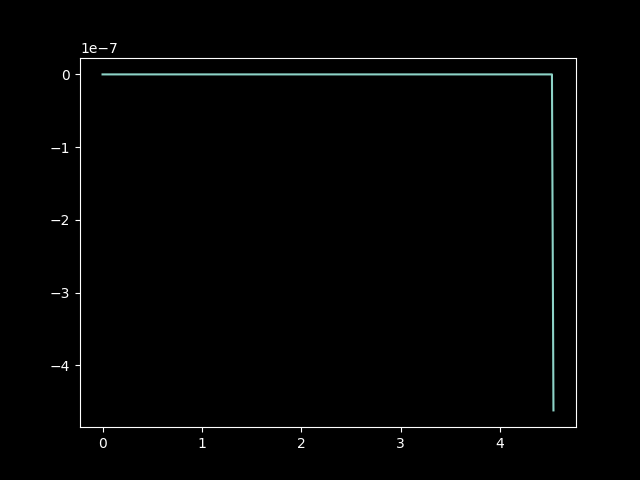

In [147]:
plt.close('all')
plt.plot(Podd.betas, Podd.alphas.real);

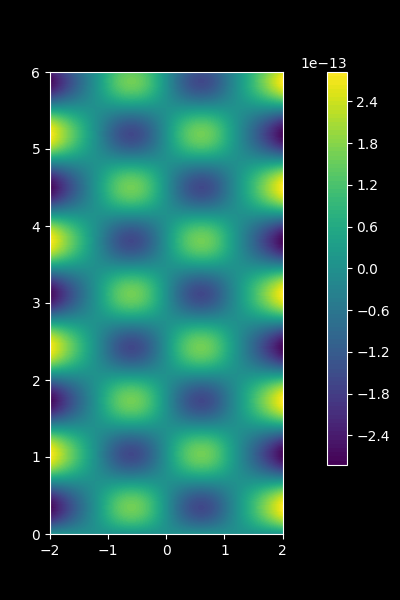

In [148]:
A.plot_field_2d(Podd.propagate,  zmax=6, zref=400, cmap='viridis', pad=.1, colorbar=True, part='imag')


In [149]:
F = lambda x, zs=None : -Peven.propagate(x,zs) - Pimag.propagate(x,zs)

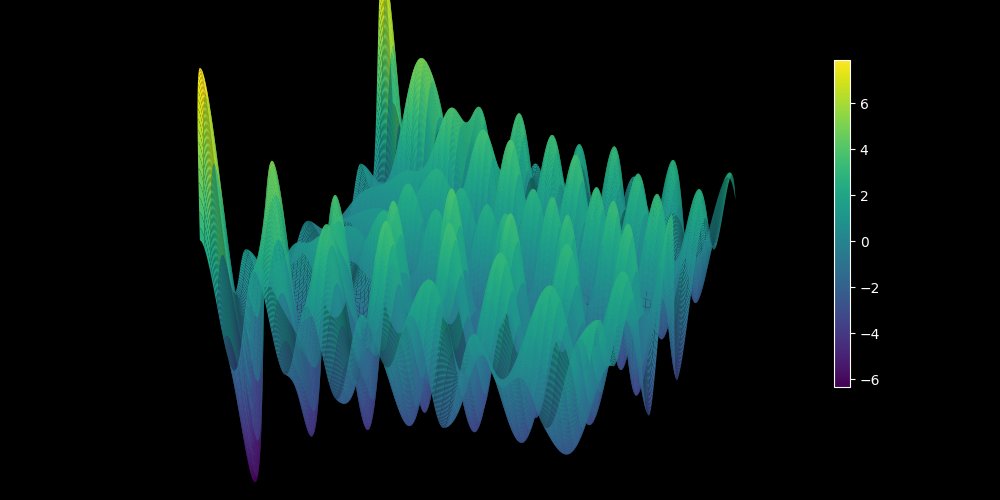

In [150]:
A.plot_field_2d(F, xs=xs, zmax=10, zref=400, surface=True, cstride=5, rstride=5)

In [151]:
Fslice = lambda x, zs=0: -Peven.slice_propagate(x,zs) - Pimag.slice_propagate(x,zs)

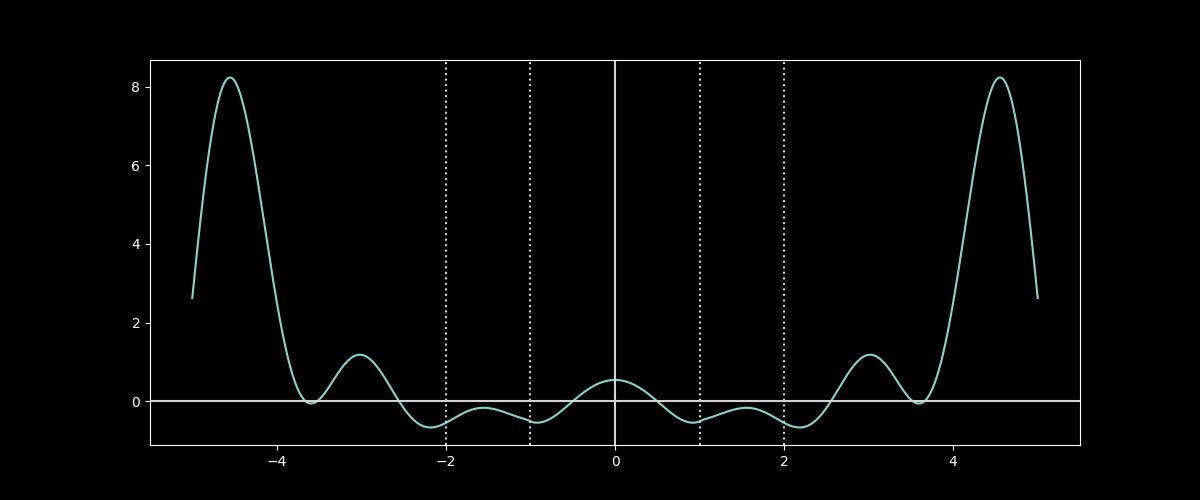

In [153]:
A.plot_field_1d(Fslice, xs=xs, part='real')
# Xs = np.linspace(-1, 1, 100)
# plt.plot(Xs, .5*(1-(Xs/.5)**2))

## Propagation for Dirac

In [157]:
Pimag = Propagator(exact_coeff_func=dirac_exact, Lx=-1, Rx=1, R_beta=300,  N_beta=600, imag_type=True)

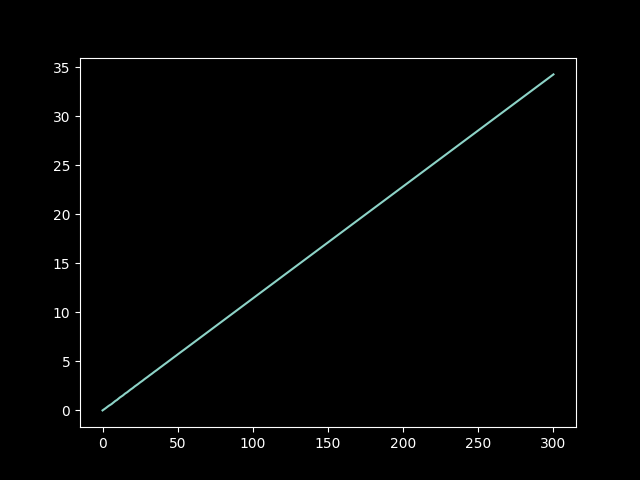

In [160]:
plt.close('all')
plt.plot(Pimag.betas.imag, Pimag.alphas.imag);

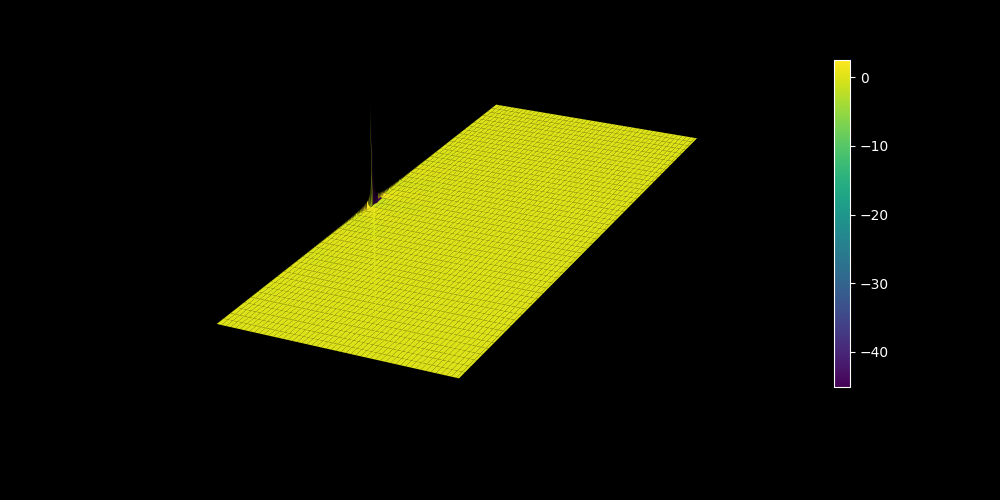

In [161]:
A.plot_field_2d(Pimag.propagate, xs=xs, surface=True, part='real', zoom=2)

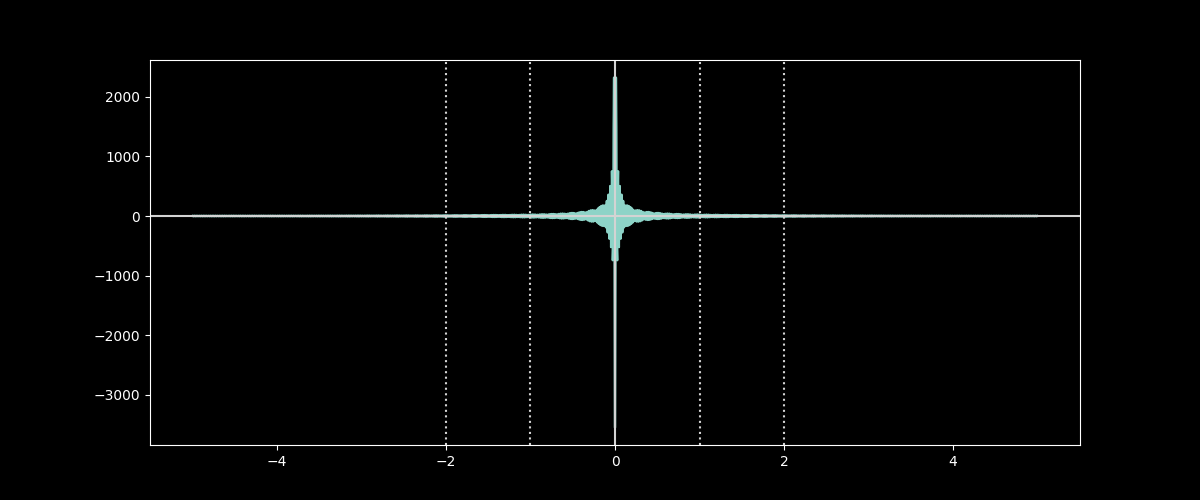

In [162]:
plt.close('all')
A.plot_field_1d(Pimag.slice_propagate, xs=xs)

In [164]:
Peven = Propagator(exact_coeff_func=dirac_exact, N_beta=300)

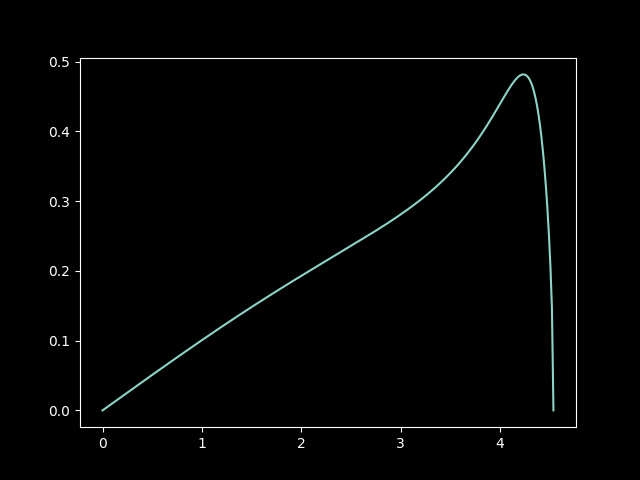

In [165]:
plt.close('all')
plt.plot(Peven.betas, Peven.alphas.real);

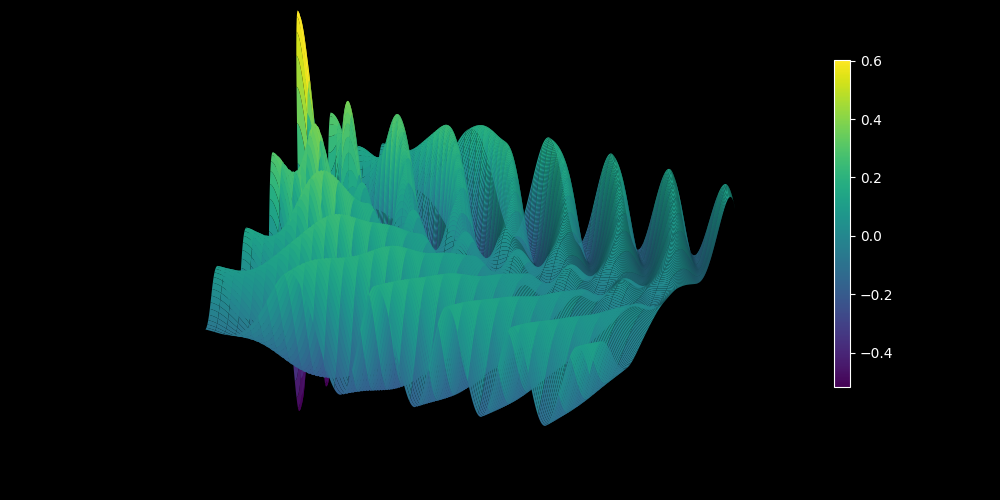

In [168]:
A.plot_field_2d(Peven.propagate, xs=xs, zmax=10, zref=400, colorbar=True, figwidth=5, surface=True,
                cstride=10, rstride=10, zoom=2, part='real')


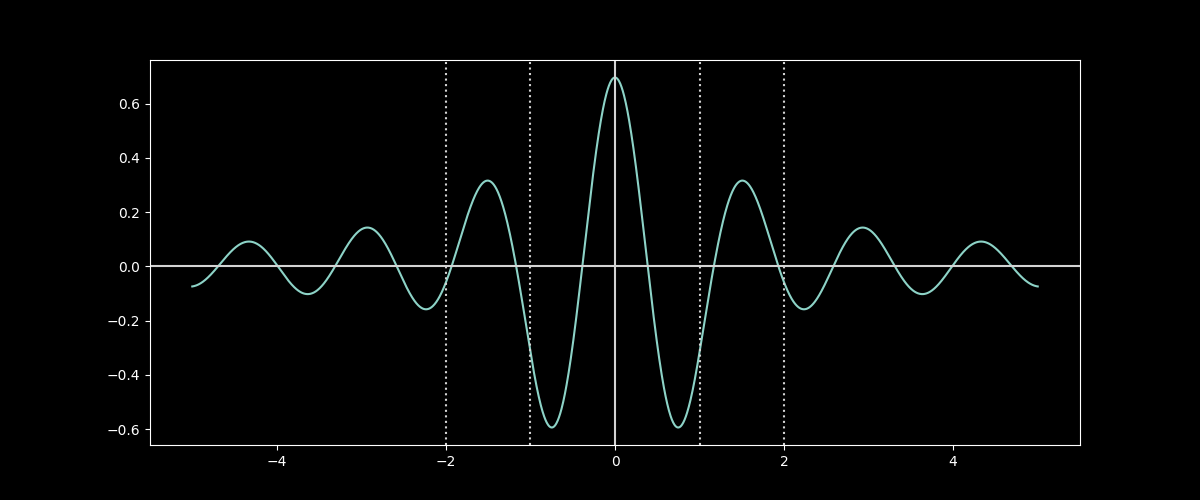

In [169]:
A.plot_field_1d(Peven.slice_propagate, xs=xs, part='real')


In [172]:
Podd = Propagator(exact_coeff_func=dirac_exact, N_beta=300, sign='-1')

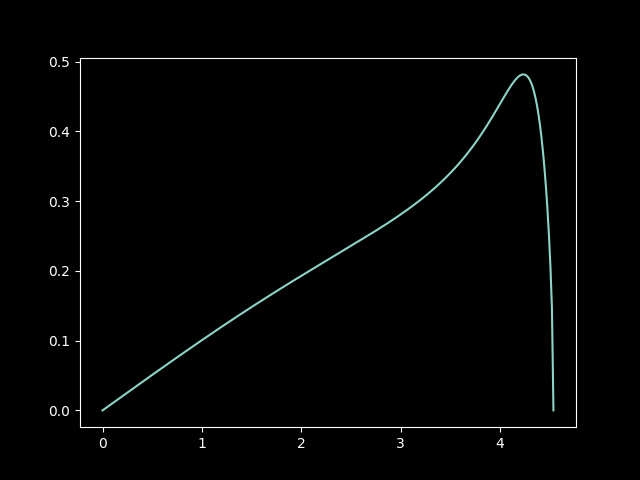

In [175]:
plt.close('all')
plt.plot(Podd.betas, Podd.alphas.real);

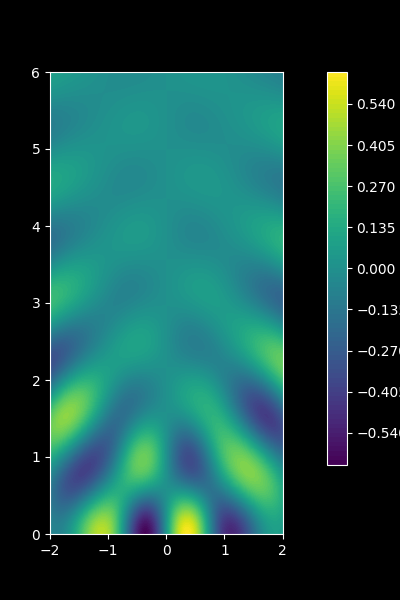

In [177]:
A.plot_field_2d(Podd.propagate,  zmax=6, zref=400, cmap='viridis', pad=.1, colorbar=True, part='real')


In [184]:
F = lambda x, zs=None : Peven.propagate(x,zs) + Podd.propagate(x,zs)

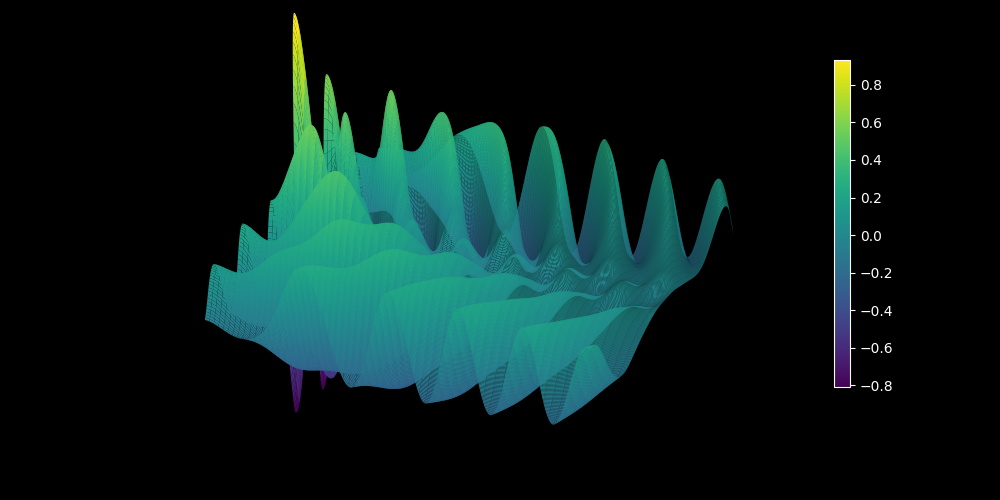

In [185]:
A.plot_field_2d(F, xs=xs, zmax=10, zref=400, surface=True, cstride=5, rstride=5)

In [188]:
Fslice = lambda x, zs=0: Peven.slice_propagate(x,zs) + Podd.slice_propagate(x,zs)

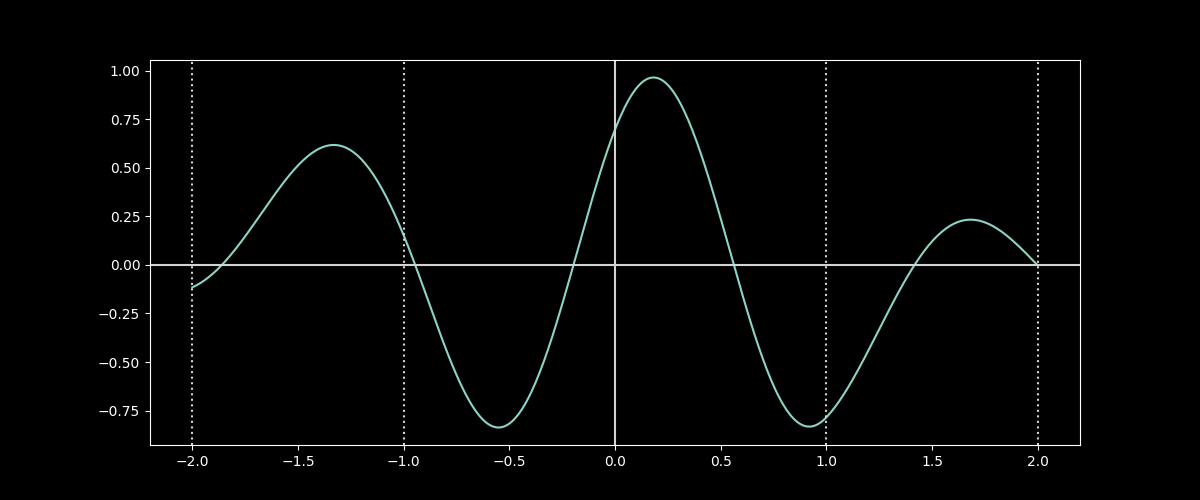

In [189]:
A.plot_field_1d(Fslice, part='real')
# Xs = np.linspace(-1, 1, 100)
# plt.plot(Xs, .5*(1-(Xs/.5)**2))